# 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [2]:
path = r"C:\Users\edriesberg\Google Drive\Instacart Basket Analysis"

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_merge.pkl'))

In [4]:
ords_prods_merge.head(5)

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest day,busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spend_flag,order_freq,order_freq_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


# 03. Visualizations

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

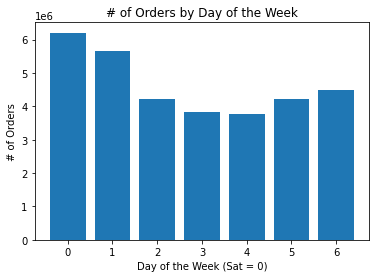

In [6]:
bar_x = ords_prods_merge['orders_day_of_week'].value_counts().index.tolist()
bar_y = ords_prods_merge['orders_day_of_week'].value_counts().tolist()
plt.bar(bar_x,bar_y)
plt.xlabel('Day of the Week (Sat = 0)')
plt.ylabel('# of Orders')
plt.title('# of Orders by Day of the Week')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

In [7]:
# Completed in a previous cell
# bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

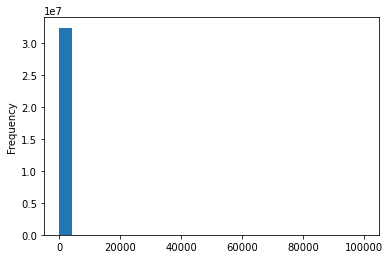

In [8]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [9]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

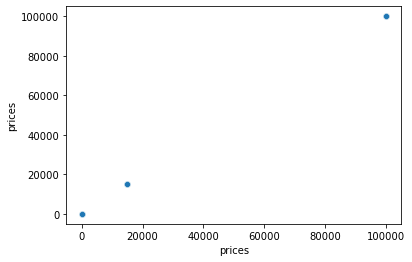

In [10]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [11]:
ords_prods_merge.loc[ords_prods_merge['prices']>100,'prices'] = np.nan

In [12]:
ords_prods_merge['prices'].max()

25.0

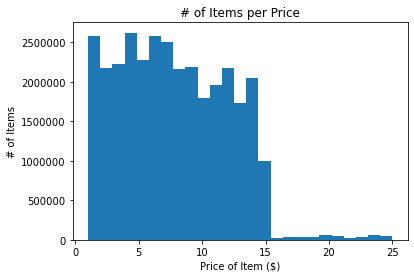

In [13]:
hist = ords_prods_merge['prices']
plt.hist(hist,25)
plt.xlabel('Price of Item ($)')
plt.ylabel('# of Items')
plt.title('# of Items per Price')
plt.ticklabel_format(style='plain')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices.png'))

In [14]:
# Completed on previous step
# hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices.png'))

In [15]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
big = ords_prods_merge[dev]

In [18]:
small = ords_prods_merge[~dev]

In [19]:
df_2 = small[['orders_day_of_week','prices']]

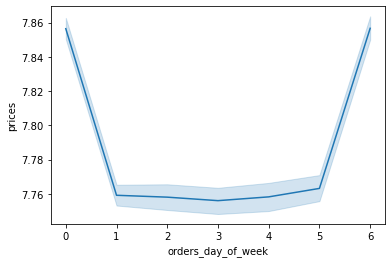

In [20]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_order-day_price.png'))